In [232]:
import requests
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.stats import linregress
from scipy.stats import pearsonr
from scipy.stats import zscore
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [233]:
df_red = pd.read_csv('winequality-red .csv', sep  = ';')
df_white = pd.read_csv('winequality-white.csv', sep = ';')

In [234]:
df_red.head()

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4  0.70 0.00 1.9 0.076 11.0 34.0 0.9978 3.51 0.56 9.4                                                  5                                                                                                                      
7.8  0.88 0.00 2.6 0.098 25.0 67.0 0.9968 3.20 0.68 9.8                                                  5                                                                                                                      
     0.76 0.04 2.3 0.092 15.0 54.0 0.9970 3.26 0.65 9.8                                                  5                                                                                                                      
11.2 0.28 0.56 1.9 0.075 17.0 60.0 0.9980 3.16 0.58 9.8                                                  6                                                                                                                      
7.4  0.70 0.00 1.9 0.076 11.0 34.0 0.9978 3.51 0.56 9.4                                                  5

## Fixing DF Columns

In [235]:
df_red.reset_index(inplace = True)
df_white.reset_index(inplace = True)

In [236]:
df_red.head()

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [238]:
df_red.rename(columns = {'level_0': 'fixed_acidity',
                         'level_1':'volatile_acidity',
                         'level_2': 'citric_acid',
                         'level_3': 'residual_sugar', 
                         'level_4':'chlorides',
                         'level_5':'free_sulferdioxide',
                         'level_6':'total_sulfurdioxide',
                         'level_7':'density',
                         'level_8':'ph',
                         'level_9':'sulphates',
                         'level_10':'alcohol'}, inplace = True)

In [239]:
df_red.rename(columns = {'fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"': 'quality' }
              , inplace = True)

In [240]:
df_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulferdioxide,total_sulfurdioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [241]:
df_white.reset_index(inplace = True)

In [242]:
df_white.rename(columns = {'level_0': 'fixed_acidity',
                         'level_1':'volatile_acidity',
                         'level_2': 'citric_acid',
                         'level_3': 'residual_sugar', 
                         'level_4':'chlorides',
                         'level_5':'free_sulferdioxide',
                         'level_6':'total_sulfurdioxide',
                         'level_7':'density',
                         'level_8':'ph',
                         'level_9':'sulphates',
                         'level_10':'alcohol'}, inplace = True)

In [243]:
df_white.rename(columns = {'fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"': 'quality' }
              , inplace = True)

In [249]:
df_white= df_white.drop(columns = 'index')

In [250]:
df_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulferdioxide,total_sulfurdioxide,density,ph,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2


In [251]:
df_red['type'] = 1
df_white['type'] = 2

In [257]:
df_white

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulferdioxide,total_sulfurdioxide,density,ph,sulphates,alcohol,quality,type
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.0
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,2.0
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,0.0
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,2.0
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,2.0
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,2.0
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,2.0
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,2.0


In [252]:
combined_df = pd.concat([df_red, df_white], axis =1)

In [125]:
df_red['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

## Intial Fit Test

In [94]:
# Your code here - Define the target and predictors

p = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','free_sulferdioxide', 'chlorides', 'total_sulfurdioxide', 'density', 'ph','sulphates', 'alcohol']
target = 'quality'

In [95]:
train, test = train_test_split(df_red)

In [100]:
predictors = '+'.join(p)
f = target + '~' + predictors
model = ols(formula=f, data=test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     19.53
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           3.05e-31
Time:                        13:53:24   Log-Likelihood:                -389.61
No. Observations:                 400   AIC:                             803.2
Df Residuals:                     388   BIC:                             851.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              29.9786     42.456      0.706      0.481     -53.494     113.451
fixed_acidity           0.0742      0.054      1.384      0.167      -0.031       0.179
volatile_acidity       -1.0549      0.247     -4.263      0.000      -1.542      -0.568
citric_acid            -0.6676      0.310     -2.151      0.032      -1.278      -0.057
residual_sugar          0.0057      0.029      0.192      0.848      -0.052       0.064
free_sulferdioxide      0.0063      0.005      1.385      0.167      -0.003       0.015
chlorides              -1.0829      0.798     -1.356      0.176      -2.653       0.487
total_sulfurdioxide    -0.0025      0.001     -1.761      0.079      -0.005       0.000
density               -25.9374     43.268     -0.599      0.549    -111.007      59.132
ph                     -0.6285      0.375     -1.675      0.095      -1.366       0.109
sulphates               1.0174      0.250      4.062      0.000       0.525       1.510
alcohol                 0.3036      0.056      5.415      0.000       0.193       0.414
==============================================================================
Omnibus:                        9.490   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               14.974
Skew:                          -0.131   Prob(JB):                     0.000560
Kurtosis:                       3.911   Cond. No.                     1.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [226]:
def regression(x, y, color):
    reg = linregress(x, y)
    corr, _ = pearsonr(x, y)
    if corr > 0:
        print('Positive correlation')
    elif corr < 0:
        print('Negative correlation')
    else:
        print('No correlation')
    print('Pearsons correlation: %.3f' % corr)
    print(reg)
    sns.regplot(x, y, color=color)

In [ ]:
for x in data_log:
    if x == '-inf':
        x.replace('-inf', 0)
        

In [106]:
for items in p:
    print(df_red[f'{items}'])

0        7.4
1        7.8
2        7.8
3       11.2
4        7.4
        ... 
1594     6.2
1595     5.9
1596     6.3
1597     5.9
1598     6.0
Name: fixed_acidity, Length: 1599, dtype: float64
0       0.700
1       0.880
2       0.760
3       0.280
4       0.700
        ...  
1594    0.600
1595    0.550
1596    0.510
1597    0.645
1598    0.310
Name: volatile_acidity, Length: 1599, dtype: float64
0       0.00
1       0.00
2       0.04
3       0.56
4       0.00
        ... 
1594    0.08
1595    0.10
1596    0.13
1597    0.12
1598    0.47
Name: citric_acid, Length: 1599, dtype: float64
0       1.9
1       2.6
2       2.3
3       1.9
4       1.9
       ... 
1594    2.0
1595    2.2
1596    2.3
1597    2.0
1598    3.6
Name: residual_sugar, Length: 1599, dtype: float64
0       11.0
1       25.0
2       15.0
3       17.0
4       11.0
        ... 
1594    32.0
1595    39.0
1596    29.0
1597    32.0
1598    18.0
Name: free_sulferdioxide, Length: 1599, dtype: float64
0       0.076
1       0.098


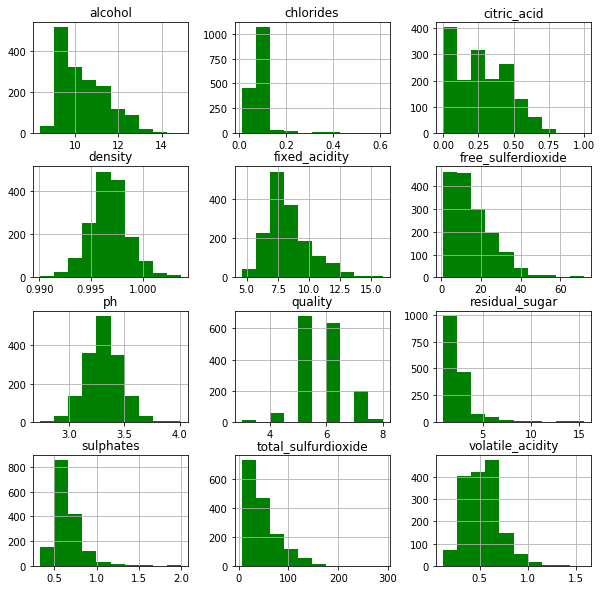

In [111]:
df_red.hist(figsize=(10,10), color = 'green')
plt.show()

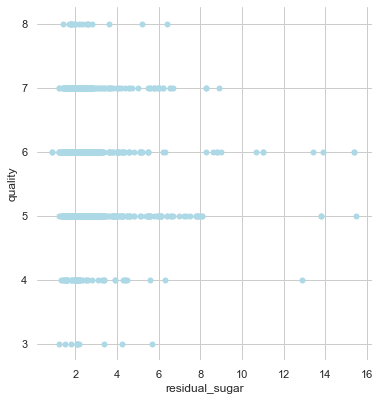

In [124]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x= df_red['residual_sugar'], y = df_red['quality'],
                sizes=(1, 8), linewidth=0,
                 ax=ax, color = 'lightblue', label = '')


# sns.scatterplot(x= df['S&P'], y = df['date'],
#                 sizes=(1, 8), linewidth=0,
#                  ax=ax, color = 'lightblue', label = '')
plt.show()

In [ ]:
#try z-scoring data
#create polynomials // exponentiate all values 

In [189]:
def log_transform(df):
    """Performs log transformation of a dataframes columns. If columns value is equal to 0, 0.001 will be logged instead."""
    logged = []
    for column in df.columns:
        logged.append(df[f'{column}'].transform(lambda x: np.log(x) if x !=0 else np.log(0.001)))
    logged_df = pd.DataFrame(logged)
    return logged_df.transpose()
        

In [187]:
transform = log_transform(df_red)

In [188]:
transform

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulferdioxide,total_sulfurdioxide,density,ph,sulphates,alcohol,quality
0,2.001480,-0.356675,-6.907755,0.641854,-2.577022,2.397895,3.526361,-0.002202,1.255616,-0.579818,2.240710,1.609438
1,2.054124,-0.127833,-6.907755,0.955511,-2.322788,3.218876,4.204693,-0.003205,1.163151,-0.385662,2.282382,1.609438
2,2.054124,-0.274437,-3.218876,0.832909,-2.385967,2.708050,3.988984,-0.003005,1.181727,-0.430783,2.282382,1.609438
3,2.415914,-1.272966,-0.579818,0.641854,-2.590267,2.833213,4.094345,-0.002002,1.150572,-0.544727,2.282382,1.791759
4,2.001480,-0.356675,-6.907755,0.641854,-2.577022,2.397895,3.526361,-0.002202,1.255616,-0.579818,2.240710,1.609438
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.824549,-0.510826,-2.525729,0.693147,-2.407946,3.465736,3.784190,-0.005113,1.238374,-0.544727,2.351375,1.609438
1595,1.774952,-0.597837,-2.302585,0.788457,-2.780621,3.663562,3.931826,-0.004892,1.258461,-0.274437,2.415914,1.791759
1596,1.840550,-0.673345,-2.040221,0.832909,-2.577022,3.367296,3.688879,-0.004269,1.229641,-0.287682,2.397895,1.791759
1597,1.774952,-0.438505,-2.120264,0.693147,-2.590267,3.465736,3.784190,-0.004540,1.272566,-0.342490,2.322388,1.609438


In [182]:
df_white

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulferdioxide,total_sulfurdioxide,density,ph,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulferdioxide,total_sulfurdioxide,density,ph,sulphates,...,citric_acid,residual_sugar,chlorides,free_sulferdioxide,total_sulfurdioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [200]:
df_red['type'] = 1
df_white['type'] = 2

In [208]:
df_white

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulferdioxide,total_sulfurdioxide,density,ph,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,2
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,2
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,2


In [202]:
combined_df = pd.concat([df_red, df_white], axis =1)

In [203]:
combined_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulferdioxide,total_sulfurdioxide,density,ph,sulphates,...,residual_sugar,chlorides,free_sulferdioxide,total_sulfurdioxide,density,ph,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,2
4894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,2
4895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,2
4896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,2


In [196]:
ype_dummy = pd.get_dummies(['type'],prefix = 'type_cat', drop_first=True)

NameError: name 'wine_df' is not defined

In [191]:
ype_dummy = pd.get_dummies(wine_df['type'],prefix = 'type_cat', drop_first=True)


#wine_df = pd.concat([wine_df, type_dummy], axis = 1)

NameError: name 'wine_df' is not defined

In [ ]:
regression(df_red['alcohol'],df_red['quality'], 'green')

In [ ]:
#zscore()